Project Name:
Fall Detection with Perceptron

gpt 4-0 https://chatgpt.com/c/66f9645c-a768-8000-ab7a-dcb226e2ce17


Filename:
fall_detection_perceptron.py

Short Description:
This project uses a Perceptron model to detect falls based on incident descriptions. The text data is vectorized using TF-IDF and then classified as a fall or non-fall using the perceptron learning rule. The model can predict fall events based on incident text, offering a simple yet effective method for classification.

Perceptron Learning Rule:
The perceptron learning rule updates the model's weights incrementally based on the error in prediction. If the perceptron makes an incorrect prediction, the weights are adjusted by adding the product of the learning rate, the input vector, and the difference between the actual and predicted output. This process continues until the model converges to a solution or reaches the maximum number of iterations.

In [9]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib 
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 53.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 53.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m 

### Clean and Normalize The Data

#### Normalizing Text
- Converting text to lowercase: Ensures that "Fall" and "fall" are treated as the same word.
- Removing special characters or numbers (optional): Depending on the data, you might want to remove punctuation, numbers, or other irrelevant characters.
- Removing stopwords (optional): You might also want to remove common stopwords (like "and," "the," etc.) to reduce noise in the dataset.

In [3]:
import nltk
nltk.download('stopwords')
import re # regular expression library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

class DataCleanerAndNormalizer:
    def __init__(self, df):
        self.df = df
    
    def clean_data(self):
  #      print("First few rows of the dataset:")
  #      print(self.df.head())

        # Get a count of rows with missing data
        missing_data_count = self.df.isnull().sum()  # the isnull().sum() will show the data type of the counts
        print("\nCount of missing data in each column:")
        print(missing_data_count)

        # Get the total number of rows with any missing data
        rows_with_missing_data = self.df.isnull().any(axis=1).sum()
        print(f"\nTotal number of rows with missing data: {rows_with_missing_data}")

        # Drop rows with any missing data
        df_cleaned = self.df.dropna()

        # Display the first few rows of the cleaned DataFrame to verify looks good high level overview
        print("\nFirst few rows of the cleaned dataset:")
        print(df_cleaned.head())

        return df_cleaned
    
    def normalize_data(self):
        # Normalize text: convert to lowercase and remove special characters
        self.df['Description'] = self.df['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)  # Convert to lowercase for qualatative data
       
        # self.df['Description'] = self.df['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # Remove special characters, optional step
        # Removing stopwords (optional): You might also want to remove common stopwords (like "and," "the," etc.) to reduce noise in the dataset.
        # For this, you can use the NLTK library.
  
        stop = stopwords.words('english')
        #self.df['Description'] = self.df['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]) if isinstance(x, str) else x)
        
        return self.df
    
    def get_most_frequent_words(self, corpus, top_n=10):
        combined_text = ' '.join(corpus)
        
        # Remove numbers
        combined_text = re.sub(r'\d+', '', combined_text)
        
        # Tokenize the text
        words = combined_text.split()
        
        # Remove stopwords
        stop = set(stopwords.words('english'))
        words = [word for word in words if word not in stop]
        
        # Count word frequencies
        word_counts = Counter(words)
        
        # Get the most common words
        most_common_words = word_counts.most_common(top_n)
        
        # Return only the words
        return [word for word, count in most_common_words]
    
    def get_number_of_words_feature_names(self, corpus, max_features=None):
        vectorizer = TfidfVectorizer(max_features=max_features)
        vectorizer.fit(corpus)
        feature_names = vectorizer.get_feature_names_out()
        print("Unique words in the corpus:", feature_names)
        
        return len(feature_names), feature_names

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/squeebit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Main Script


Count of missing data in each column:
Description    2
isFallFlg      0
dtype: int64

Total number of rows with missing data: 2

First few rows of the cleaned dataset:
                                         Description  isFallFlg
0                    Testing an incident submission.          1
1                                               test          0
2           Melanie fell from her bed this morning.           1
3  Pam was found on the floor of her unit; reside...          1
4                                              Test3          1


/var/folders/74/_jf5jntd0m73y8b26bl9bz780000gn/T/ipykernel_11076/3553120068.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Description'] = self.df['Description'].apply(lambda x: x.lower() if isinstance(x, str) else x)  # Convert to lowercase for qualatative data


Unique words in the corpus: ['00' '000' '0000' ... 'zygoma' 'zygomatic' 'zyrtec']
Number of unique words in the corpus: (17139, array(['00', '000', '0000', ..., 'zygoma', 'zygomatic', 'zyrtec'],
      dtype=object))
Most frequent words: ['resident', 'floor', 'stated', 'staff', 'called', 'notified', 'found', 'room', '.', 'pain']
None


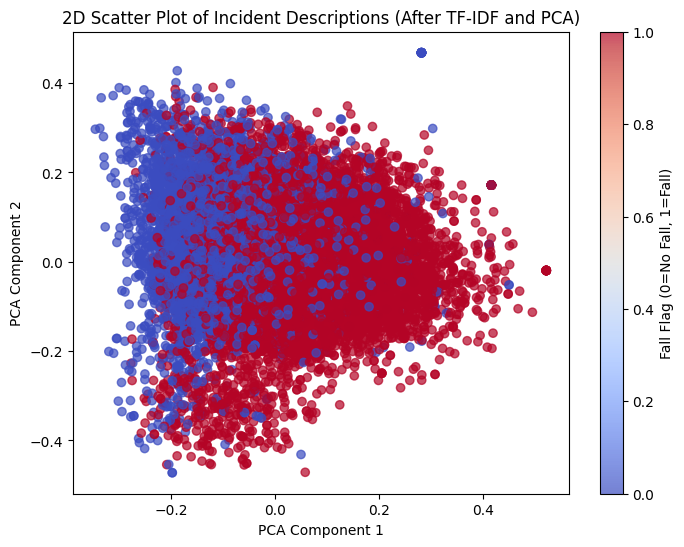

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      1090
           1       0.91      0.82      0.86      2304

    accuracy                           0.82      3394
   macro avg       0.80      0.83      0.81      3394
weighted avg       0.84      0.82      0.83      3394



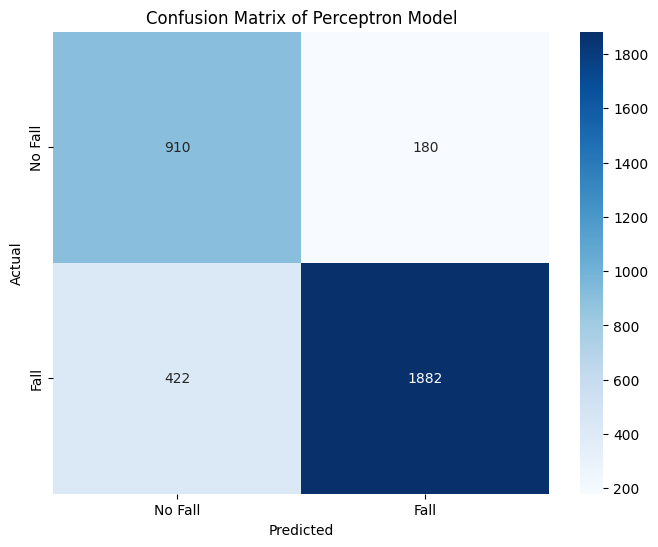

Prediction for 'This is a fall': [1]
Prediction for 'This is not a fall': [1]
Prediction for 'sky': [0]
Prediction for 'fall': [1]
Prediction for 'I flew to the mall': [0]
Prediction for 'I slipped in mud': [1]
Prediction for 'she fell but not really this is a test': [1]
Prediction for 'I walked to the store': [0]
Prediction for 'The weather is nice today': [0]


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Load the dataset
fall_data = pd.read_csv("data/fall_data_v1.csv")

# Clean the dataset
data_clearner_normalizer = DataCleanerAndNormalizer(fall_data)
df_cleaned = data_clearner_normalizer.clean_data()  # Returns the cleaned DataFrame
data_clearner_normalizer.df = df_cleaned  # Update the DataFrame for normalization

# Call the normalize_data method to normalize the dataset
df_normalized = data_clearner_normalizer.normalize_data()

df_normalized.to_csv("data/fall_data_v2.csv", index=False)

# # Check if the DataFrame was successfully after data cleaning
# print(f"\nDataset after data cleaning: {df_cleaned.shape[0]} rows, {df_cleaned.shape[1]} columns")

# # Check if the DataFrame was successfully after data normalization
# print(f"\nDataset after data normalization: {df_normalized.shape[0]} rows, {df_normalized.shape[1]} columns")

# Get the number of unique words in the corpus
corpus = df_cleaned['Description']  # Use the cleaned data
num_words = data_clearner_normalizer.get_number_of_words_feature_names(corpus)
print(f"Number of unique words in the corpus: {num_words}")

# Example usage
corpus = df_cleaned['Description']  # Use the cleaned data
top_words = data_clearner_normalizer.get_most_frequent_words(corpus, top_n=10)
print(f"Most frequent words: {top_words}")

# Extract features and target from the cleaned dataset
X_cleaned = df_normalized['Description']
y_cleaned = df_normalized['isFallFlg']

# Vectorize the cleaned text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_vectorized_cleaned = vectorizer.fit_transform(X_cleaned)

print(vectorizer.vocabulary)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vectorized_cleaned.toarray())

# 2D scatter plot of the data points after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cleaned, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Fall Flag (0=No Fall, 1=Fall)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Scatter Plot of Incident Descriptions (After TF-IDF and PCA)')
plt.show()

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_vectorized_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize and train the perceptron model
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test set
y_pred_cleaned = perceptron_model.predict(X_test_cleaned)

# Generate and display the classification report
report_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
print("Classification Report:\n", report_cleaned)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_cleaned)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fall', 'Fall'], yticklabels=['No Fall', 'Fall'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Perceptron Model')
plt.show()

# Test with sample inputs
def predict_fall(description):
    test_input_vectorized = vectorizer.transform([description])
    prediction = perceptron_model.predict(test_input_vectorized)
    return prediction

# Test with various inputs - i need to make these more realistic and categorize them
print("Prediction for 'This is a fall':", predict_fall("This is a fall"))
print("Prediction for 'This is not a fall':", predict_fall("This is not a fall"))
print("Prediction for 'sky':", predict_fall("sky"))
print("Prediction for 'fall':", predict_fall("fall"))
print("Prediction for 'I flew to the mall':", predict_fall("I flew to the mall"))
print("Prediction for 'I slipped in mud':", predict_fall("I slipped in mud"))
print("Prediction for 'she fell but not really this is a test':", predict_fall("she fell but not really this is a test"))
print("Prediction for 'I walked to the store':", predict_fall("I walked to the store"))
print("Prediction for 'The weather is nice today':", predict_fall("The weather is nice today"))
